## Descripción del Proyecto

El análisis de riesgo crediticio es una tarea fundamental en el sector financiero, ya que permite a las instituciones evaluar la probabilidad de incumplimiento de pago por parte de los clientes. En este proyecto, se analizará diversas características de los clientes de una entidad bancaria en Colombia con el objetivo de identificar qué factores están relacionados con el estado de su crédito (aprobado, en mora o rechazado).

Para ello, se explorará variables clave a través de diferentes técnicas de análisis y visualización de datos, se busca comprender el impacto de estas variables en la evaluación del crédito, proporcionando información valiosa para la toma de decisiones financieras.

### Objetivo del Proyecto

Identificar qué factores están relacionados con el incumplimiento de pagos en créditos, mediante el análisis de las características de los clientes y la comparación de sus datos en función del estado de su crédito.

#### Inicialización

In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar los datos
df = pd.read_csv('C:/Users/Diego Gelvez/Documents/cartera/base_riesgo_crediticio.csv')

### Preparación de los datos

In [4]:
# Imprimir informacion de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_cliente                1000 non-null   int64  
 1   edad                      1000 non-null   int64  
 2   ingresos_mensuales        1000 non-null   int64  
 3   monto_credito             1000 non-null   int64  
 4   plazo_credito             1000 non-null   int64  
 5   tasa_interes              1000 non-null   float64
 6   tipo_empleo               1000 non-null   object 
 7   historial_crediticio      1000 non-null   int64  
 8   cuota_mensual             1000 non-null   int64  
 9   porcentaje_endeudamiento  1000 non-null   float64
 10  estado_credito            1000 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 86.1+ KB


In [5]:
# Revisar las primeras filas del dataset
df.head()

,id_cliente,edad,ingresos_mensuales,monto_credito,plazo_credito,tasa_interes,tipo_empleo,historial_crediticio,cuota_mensual,porcentaje_endeudamiento,estado_credito
0,1,63,13529677,428452278,25,12.88,Pensionado,626,6026895,44.55,Rechazado
1,2,53,5321127,583850538,20,9.69,Pensionado,407,7147303,134.32,Rechazado
2,3,39,4559272,125230621,30,11.90,Pensionado,461,1589733,34.87,Rechazado
3,4,32,4276106,556150032,15,8.34,Pensionado,751,6954965,162.65,Rechazado
4,5,45,8960534,397364889,25,7.44,Dependiente,505,3788211,42.28,Rechazado


In [6]:
#Validar valores duplicados
df.duplicated().sum()

0

In [7]:
# Validar valores ausentes
df.isna().sum()

id_cliente                  0
edad                        0
ingresos_mensuales          0
monto_credito               0
plazo_credito               0
tasa_interes                0
tipo_empleo                 0
historial_crediticio        0
cuota_mensual               0
porcentaje_endeudamiento    0
estado_credito              0
dtype: int64

### Analisis exploratorio de datos

In [8]:
# Validar estadisticas generales

df.describe()

,id_cliente,edad,ingresos_mensuales,monto_credito,plazo_credito,tasa_interes,historial_crediticio,cuota_mensual,porcentaje_endeudamiento
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,44.991000,8.503751e+06,3.286343e+08,19.945000,10.417690,596.415000,4.443371e+06,67.774700
std,288.819436,11.780055,3.696426e+06,1.600429e+08,7.072623,2.582757,174.101425,2.401070e+06,57.475993
min,1.000000,25.000000,2.066150e+06,5.080918e+07,10.000000,6.000000,300.000000,4.936830e+05,4.660000
25%,250.750000,35.000000,5.316710e+06,1.903094e+08,15.000000,8.137500,446.750000,2.495744e+06,29.505000
50%,500.500000,46.000000,8.562334e+06,3.306684e+08,20.000000,10.390000,586.500000,4.239807e+06,48.865000
75%,750.250000,55.250000,1.167737e+07,4.694637e+08,25.000000,12.650000,745.250000,6.235383e+06,87.240000
max,1000.000000,64.000000,1.496606e+07,5.997052e+08,30.000000,15.000000,899.000000,1.099028e+07,404.010000


#### Distribución de variables clave

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'ingresos_mensuales'}>],
       [<Axes: title={'center': 'monto_credito'}>,
        <Axes: title={'center': 'tasa_interes'}>],
       [<Axes: title={'center': 'historial_crediticio'}>,
        <Axes: title={'center': 'porcentaje_endeudamiento'}>]],
      dtype=object)

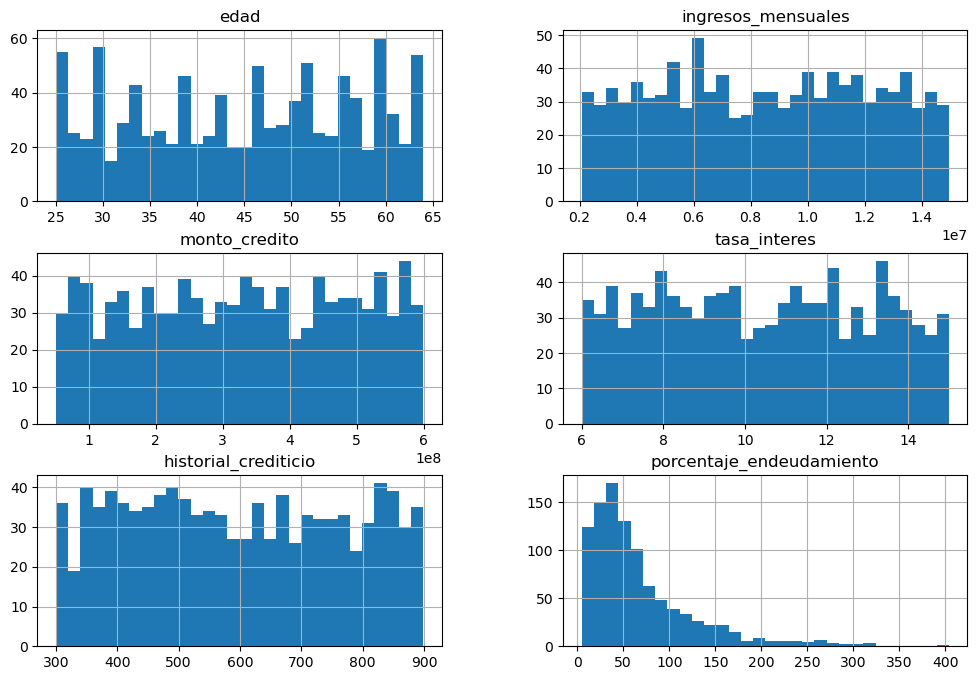

In [9]:
# Seleccionar solo variables numéricas relevantes
numeric_columns = ['edad', 'ingresos_mensuales', 'monto_credito', 'tasa_interes', 'historial_crediticio', 'porcentaje_endeudamiento']

# Crear histogramas para cada variable
df[numeric_columns].hist(figsize=(12, 8), bins= 30)


Edad: La distribución parece bastante uniforme, sin una clara concentración en un rango específico. Esto indica que hay clientes de todas las edades dentro del rango observado (aproximadamente 25 a 65 años).

Ingresos mensuales: La distribución es relativamente uniforme, aunque se observan algunos picos en ciertos valores. Esto podría indicar que hay grupos de clientes con ingresos más comunes en ciertos rangos.

Monto del crédito: Presenta una distribución bastante uniforme, lo que sugiere que los montos de los créditos están bien distribuidos entre los clientes sin una tendencia clara hacia valores específicos.

Tasa de interés: También muestra una distribución relativamente uniforme con algunos picos, lo que podría indicar que ciertos valores de tasas de interés son más frecuentes.

Historial crediticio: La distribución es uniforme con algunas fluctuaciones. No parece haber una concentración fuerte en ciertos valores, lo que indica que los clientes tienen diversas puntuaciones de historial crediticio.

Porcentaje de endeudamiento: A diferencia de las otras variables, esta tiene una distribución sesgada hacia la izquierda, con una gran concentración de clientes en valores bajos (cercanos a 0-50), y pocos clientes con porcentajes de endeudamiento muy altos (más de 200). Esto indica que la mayoría de los clientes tiene niveles bajos de endeudamiento en comparación con sus ingresos o créditos.

#### Relación de las variables con el estado del crédito

##### ¿Cómo varía el monto del crédito según el estado?

Text(0, 0.5, 'Promedio Monto de Crédito  x10^8 (COP)')

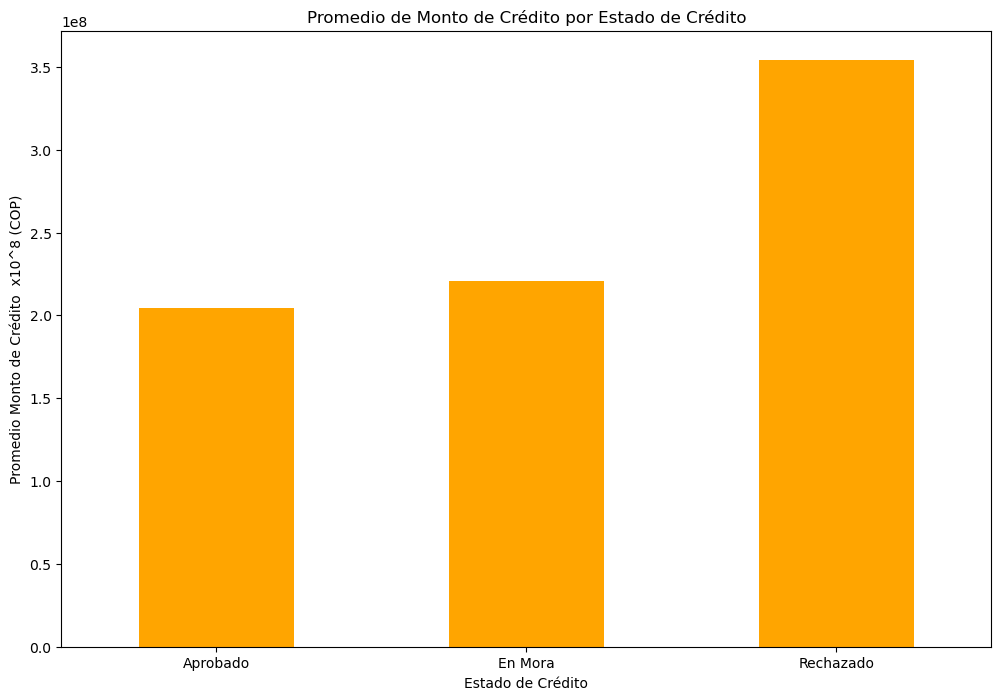

In [27]:
# Promedio del monto de credito por estado de credito
df_group = df.groupby('estado_credito')['monto_credito'].mean()

df_group.plot(kind='bar', figsize=(12, 8), rot= 0, color='orange')
plt.title('Promedio de Monto de Crédito por Estado de Crédito')
plt.xlabel('Estado de Crédito')
plt.ylabel('Promedio Monto de Crédito  x10^8 (COP)')


Los créditos rechazados tienden a tener montos más altos en promedio. Esto podría indicar que los clientes que solicitan montos mayores tienen más dificultades para que se aprueben sus créditos, posiblemente porque presentan mayor riesgo.

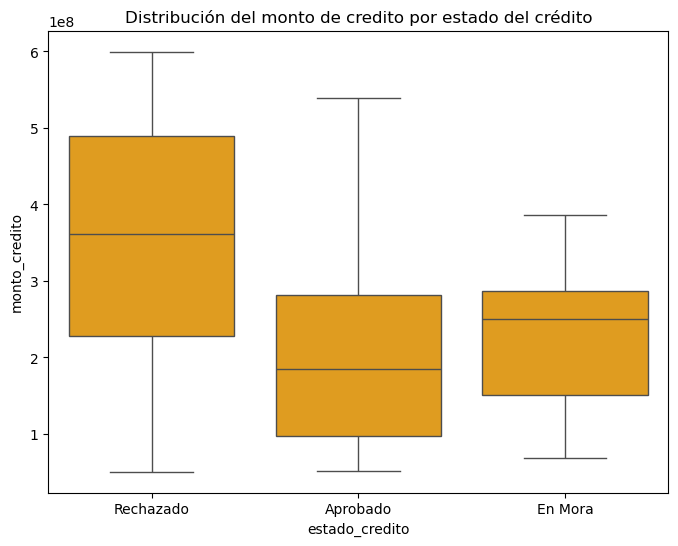

In [31]:
# Elaborar un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='estado_credito', y='monto_credito', data=df, color='orange')
plt.title('Distribución del monto de credito por estado del crédito')
plt.show()

Los créditos rechazados tienen los montos más altos en promedio y son los más dispersos. Esto sugiere que los montos elevados son más propensos a ser rechazados, posiblemente porque representan un mayor riesgo.

Los créditos aprobados tienen montos intermedios a bajos y menor dispersión. Es probable que el banco apruebe más fácilmente montos que están dentro de un rango controlado, minimizando su exposición al riesgo.

Los créditos en mora tienen montos intermedios, pero son menos dispersos. Esto indica que hay una cierta tendencia a que los clientes con montos medianos sean los que más caen en mora. Puede ser un punto de atención para el banco, ya que estos clientes podrían estar más propensos a retrasarse en sus pagos.

##### ¿Cómo varía la tasa de interés según el estado de credito?

Text(0, 0.5, 'Promedio Tasa de interés (E.A)')

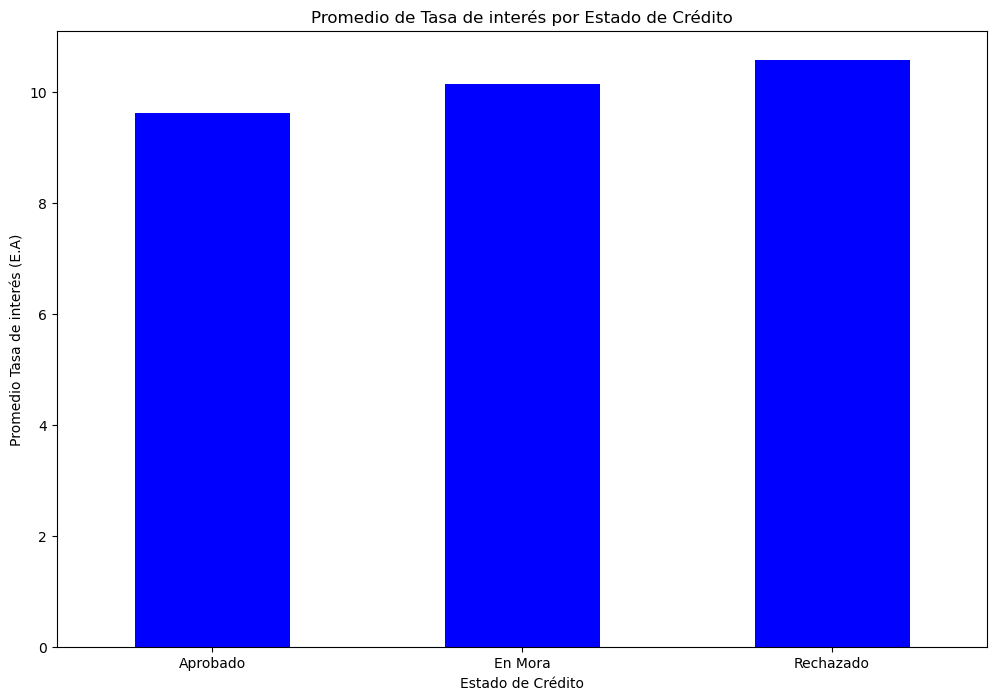

In [29]:
# Promedio de tasas de interes por estado de credito

df_tasas = df.groupby('estado_credito')['tasa_interes'].mean()

df_tasas.plot(kind='bar', figsize=(12, 8), rot=0, color='blue')
plt.title('Promedio de Tasa de interés por Estado de Crédito')
plt.xlabel('Estado de Crédito')
plt.ylabel('Promedio Tasa de interés (E.A)')


Los préstamos aprobados tienen las tasas más bajas. Probablemente, los clientes con mejor historial crediticio reciben tasas más favorables.

Los préstamos en mora tienen tasas más altas que los aprobados. Esto sugiere que las tasas de interés más altas pueden estar asociadas con un mayor riesgo de impago.

Los préstamos rechazados tienen las tasas más altas. Esto podría indicar que las entidades financieras aplican tasas más altas a clientes con mayor riesgo, lo que también podría ser una razón para su rechazo.

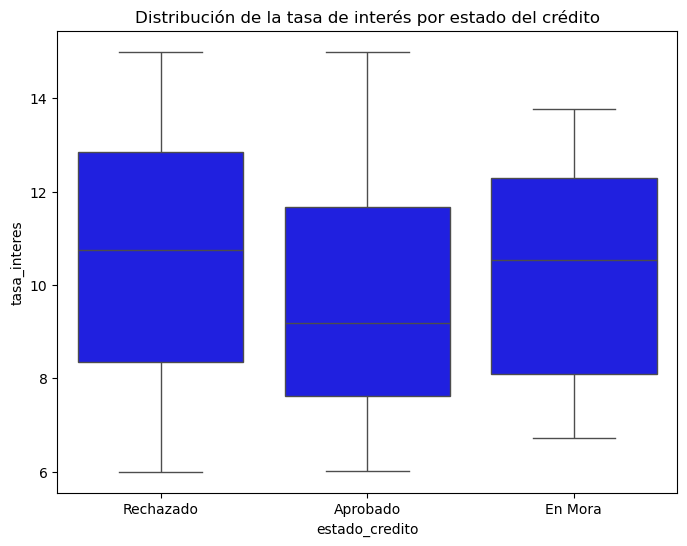

In [30]:
# Elaborar un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='estado_credito', y='tasa_interes', data=df, color='blue')
plt.title('Distribución de la tasa de interés por estado del crédito')
plt.show()

Créditos aprobados: Se otorgan con tasas más bajas en promedio. Esto puede deberse a que los clientes con menor riesgo reciben mejores condiciones.

Créditos rechazados: Se asocian con tasas de interés más altas. Posiblemente, los clientes con más riesgo de impago solicitan créditos con tasas elevadas, lo que lleva a un mayor rechazo.

Créditos en mora: Aunque la mediana es más baja que la de los rechazados, sigue siendo elevada. Esto sugiere que una tasa de interés alta podría aumentar el riesgo de que un cliente entre en mora.


##### ¿Cómo varía los ingresos mensuales según el estado de credito?

Text(0, 0.5, 'Promedio Ingresos Mensuales  x10^7 (COP)')

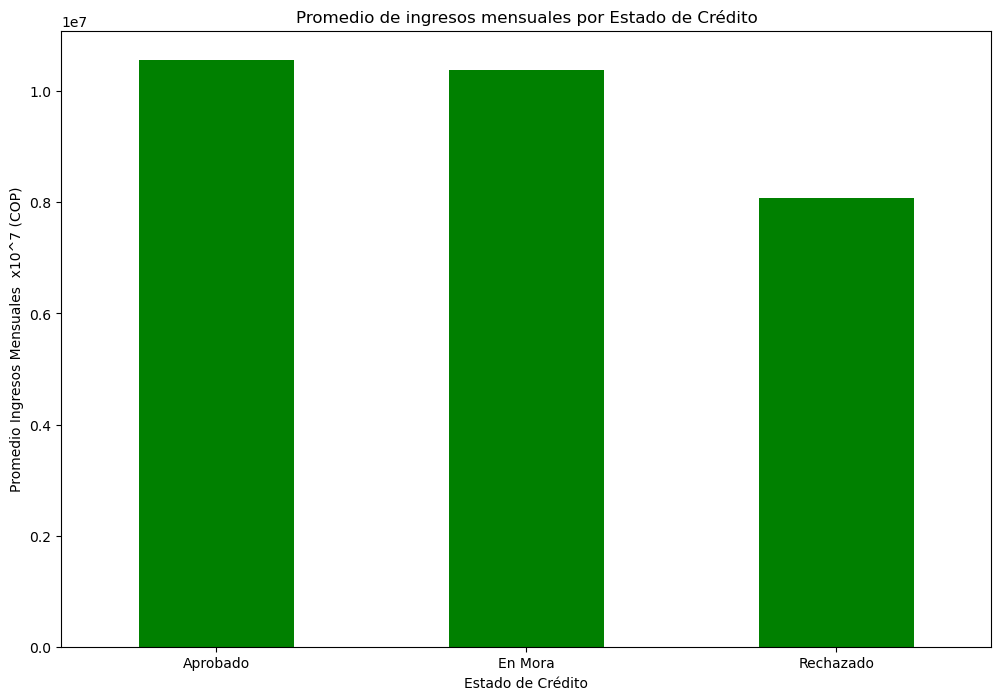

In [32]:
# Promedio de ingresos mensuales por estado de credito

df_ingresos = df.groupby('estado_credito')['ingresos_mensuales'].mean()

df_ingresos.plot(kind='bar', figsize=(12, 8), rot= 0, color='green')
plt.title('Promedio de ingresos mensuales por Estado de Crédito')
plt.xlabel('Estado de Crédito')
plt.ylabel('Promedio Ingresos Mensuales  x10^7 (COP)')


Los clientes con ingresos más altos tienen más probabilidades de aprobación. Es lógico, ya que las entidades financieras prefieren otorgar créditos a personas con mayor capacidad de pago.

Los clientes en mora tienen ingresos similares a los aprobados. Esto indica que un buen ingreso no garantiza que un cliente pagará puntualmente; puede haber otros factores de riesgo.

Los clientes rechazados tienen los ingresos más bajos. Esto sugiere que el nivel de ingreso es un criterio importante para la aprobación.

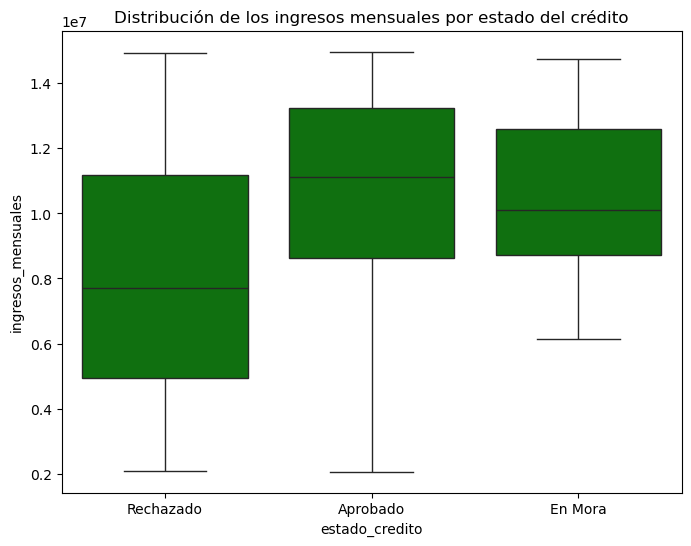

In [33]:
# Elaborar un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='estado_credito', y='ingresos_mensuales', data=df, color='green')
plt.title('Distribución de los ingresos mensuales por estado del crédito')
plt.show()

Créditos rechazados: Existen solicitudes de crédito con ingresos muy bajos y otros con ingresos muy altos.
Esto indica que algunos solicitantes con altos ingresos también pueden ser rechazados, posiblemente por otros factores (historial crediticio, deudas previas, etc.).

Créditos aprobados: Se concentran en ingresos más altos. La dispersión es moderada. Es posible que los bancos prefieran  otorgar créditos a personas con ingresos estables y elevados.

Créditos en mora: Se parecen a los aprobados, pero con una mediana un poco menor. Esto sugiere que no todos los que tienen ingresos altos pagan a tiempo. Puede haber personas con buenos ingresos que igual caen en mora, tal vez por sobreendeudamiento o falta de control financiero.

##### ¿Cómo varía el historial crediticio según el estado de credito?

Text(0, 0.5, 'Promedio de Historial Crediticio')

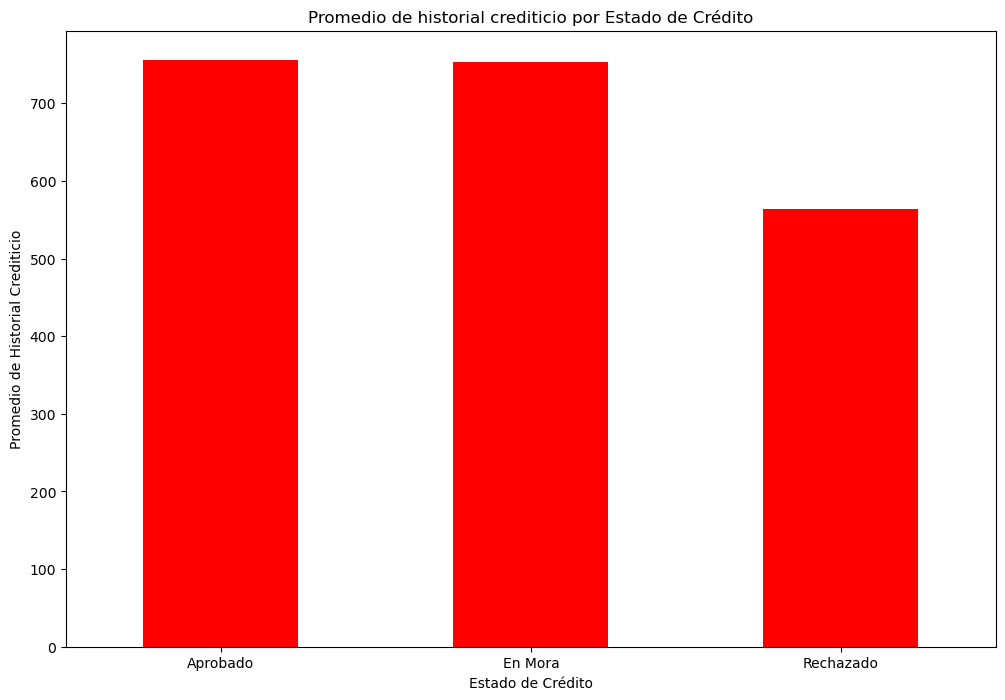

In [35]:
# Promedio de historial crediticio por estado de credito

df_ingresos = df.groupby('estado_credito')['historial_crediticio'].mean()

df_ingresos.plot(kind='bar', figsize=(12, 8), rot= 0, color='red')
plt.title('Promedio de historial crediticio por Estado de Crédito')
plt.xlabel('Estado de Crédito')
plt.ylabel('Promedio de Historial Crediticio')

Los creditos aprobados tienen el historial crediticio más alto en comparación con los otros estados. Esto indica que los clientes con mejor historial tienen más probabilidades de que su crédito sea aprobado.

en los créditos en mora  el historial crediticio es muy similar al de los aprobados, pero ligeramente menor. Esto sugiere que incluso clientes con buen historial pueden caer en mora, posiblemente por otros factores como ingresos insuficientes o tasas de interés altas.

Y los créditos rechazados tienen el historial crediticio más bajo por un margen significativo. Esto confirma que los bancos rechazan más a clientes con un historial crediticio deficiente.

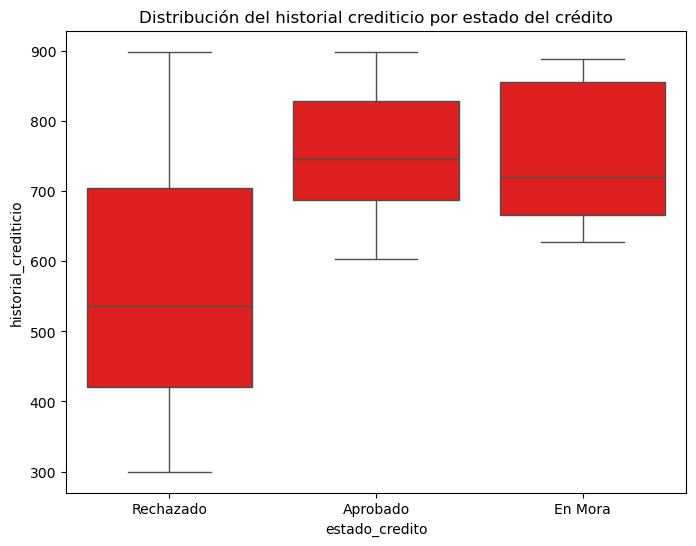

In [36]:
# Elaborar un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='estado_credito', y='historial_crediticio', data=df, color='red')
plt.title('Distribución del historial crediticio por estado del crédito')
plt.show()

Creditos Aprobados: Los clientes con historial alto tienen muchas más probabilidades de ser aprobados. Casi todos los aprobados tienen un historial superior a 600.

Creditos Rechazados: Hay una gran diferencia entre los clientes rechazados con mejor y peor historial. Los clientes con historial bajo (menor a 600) son los más propensos a ser rechazados. Sin embargo, hay algunos casos con historial alto que también fueron rechazados, lo que podría deberse a otros factores (ingresos, deudas, etc.).

Los clientes en mora tienen un historial casi tan alto como los aprobados, lo que indica que un buen historial crediticio no garantiza que el cliente pague a tiempo. Factores como ingresos, tasas de interés o carga financiera pueden estar afectando el pago.


##### ¿Cómo varía el porcentaje de endeudamiento según el estado de credito?

Text(0, 0.5, 'Promedio Porcentaje de Endeudamiento')

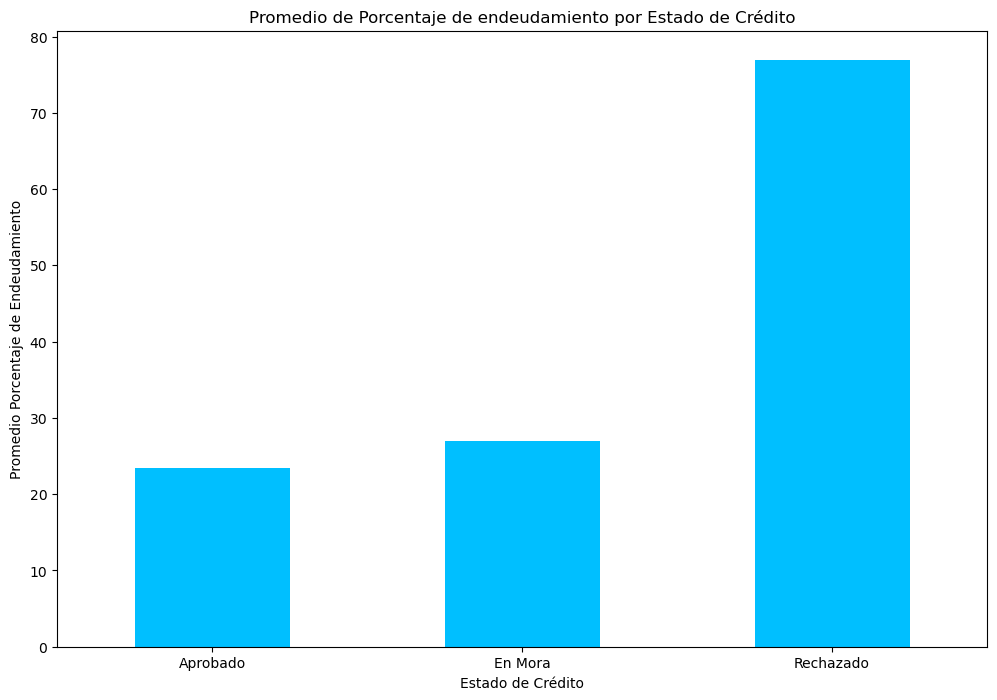

In [37]:
# Promedio de porcentaje de endeudamiento por estado de credito

df_ingresos = df.groupby('estado_credito')['porcentaje_endeudamiento'].mean()

df_ingresos.plot(kind='bar', figsize=(12, 8), rot= 0, color='deepskyblue')
plt.title('Promedio de Porcentaje de endeudamiento por Estado de Crédito')
plt.xlabel('Estado de Crédito')
plt.ylabel('Promedio Porcentaje de Endeudamiento')

Los créditos rechazados tienen un porcentaje promedio de endeudamiento mucho más alto que los demás. Los clientes rechazados probablemente no recibieron el crédito porque ya tenían demasiadas deudas.

Los créditos Aprobados tienen el porcentaje más bajo de endeudamiento. Los clientes aprobados mantienen sus deudas en un nivel que les permite seguir accediendo a crédito.

Los créditos en Mora tienen mayor el promedio de del porcentaje de endeudamiento que el de los aprobados, pero mucho menor que los rechazados. Tener más deudas aumenta el riesgo de caer en mora, pero el endeudamiento de este grupo no es tan extremo como el de los rechazados.

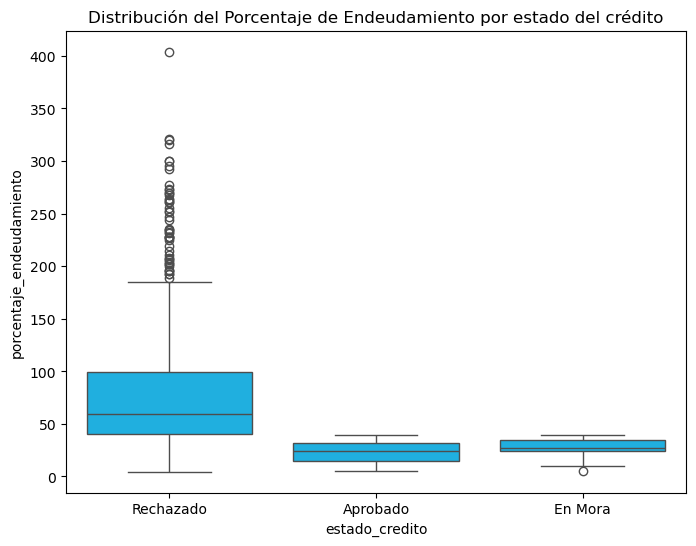

In [38]:
# Elaborar un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='estado_credito', y='porcentaje_endeudamiento', data=df, color='deepskyblue')
plt.title('Distribución del Porcentaje de Endeudamiento por estado del crédito')
plt.show()

Créditos Rechazados: Hay una gran cantidad de valores atípicos (outliers) que superan el 100%, algunos llegando hasta 400%. Este grupo tiene un alto nivel de endeudamiento en promedio. Algunos clientes tienen deudas mayores que sus ingresos, lo que los hace muy riesgosos para recibir crédito.

Créditos Aprobados: hay valores extremos significativos.La mayoría de los clientes aprobados tienen un endeudamiento bajo y estable.
Esto confirma que los bancos otorgan créditos a personas con buena capacidad de pago.

Créditos en Mora:Hay algunos valores atípicos, pero no tantos como en los rechazados.Los clientes en mora tienen un endeudamiento un poco mayor que los aprobados.A pesar de esto, no tienen tantos valores extremos como los rechazados.Puede indicar que ciertos clientes aceptables para crédito terminan teniendo dificultades para pagar. 

##### ¿Cómo varía la edad según el estado de credito?

Text(0, 0.5, 'Promedio de edad')

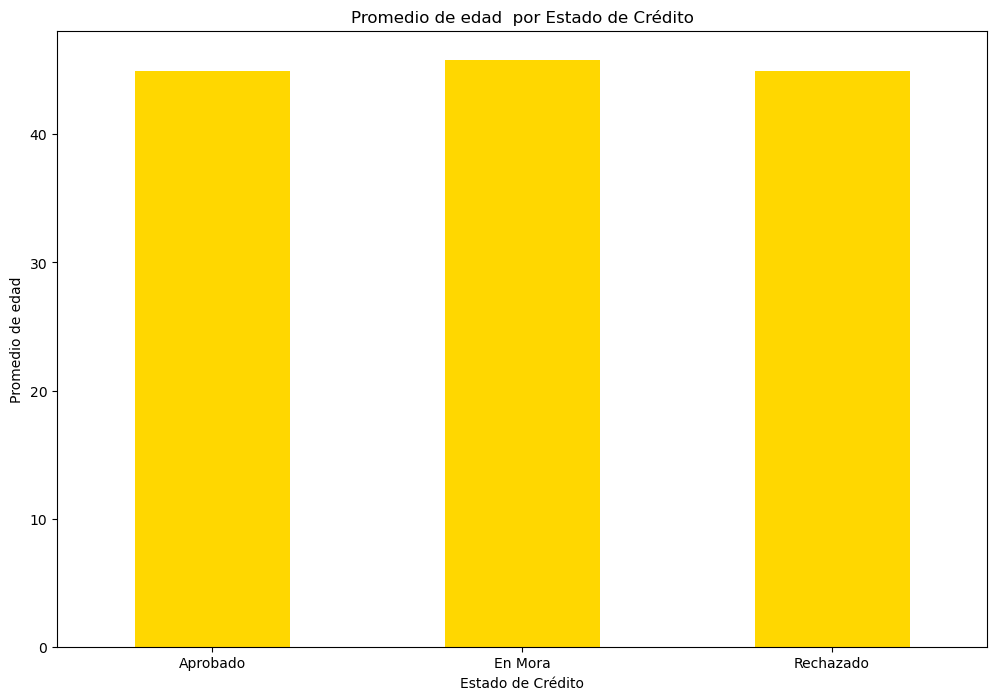

In [40]:
# Promedio de edad por estado de credito

df_ingresos = df.groupby('estado_credito')['edad'].mean()

df_ingresos.plot(kind='bar', figsize=(12, 8), rot= 0, color= 'gold')
plt.title('Promedio de edad  por Estado de Crédito')
plt.xlabel('Estado de Crédito')
plt.ylabel('Promedio de edad')

Las edades promedio de las personas con estado de crédito "aprobado" y "rechazado" son muy similares (44.97 y 44.98 años respectivamente), lo que sugiere que la edad no parece ser un factor determinante a la hora de aprobar o rechazar créditos. Sin embargo, las personas "en mora" tienen una edad promedio ligeramente más alta (45.80 años) que las otras dos categorías.

La diferencia de edad entre los tres grupos no es muy grande (solo unos 0.8 años entre "En Mora" y "Aprobado/Rechazado"), por lo que podría no ser una característica crucial para el estado del crédito. Sin embargo, sigue siendo interesante observar esta diferencia, ya que podría ser relevante en combinación con otras variables.

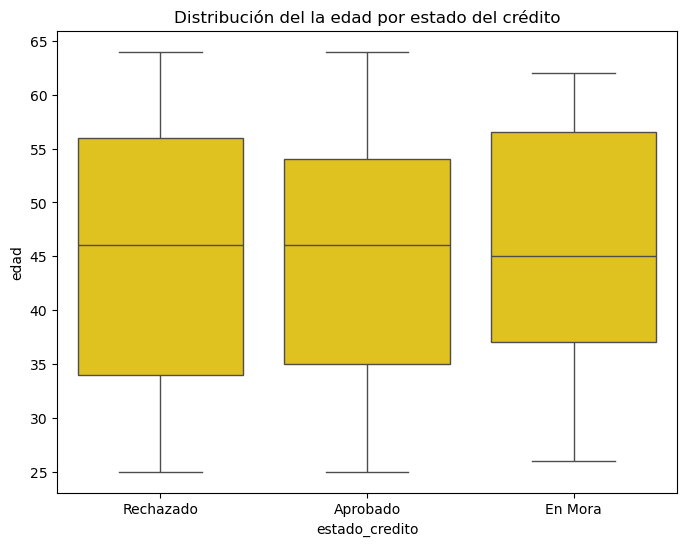

In [39]:
# Elaborar un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='estado_credito', y='edad', data=df, color='gold')
plt.title('Distribución del la edad por estado del crédito')
plt.show()

Las medianas de edad están casi en el mismo nivel en Aprobado, En Mora y Rechazado. Esto refuerza la idea de que la edad no parece ser un factor clave en la decisión crediticia.

La mayoría de los clientes tienen entre 25 y 65 años. No hay grandes diferencias en la dispersión de los datos entre los tres estados de crédito.

La mediana es un poco más alta que en los otros grupos. Esto puede indicar que las personas en mora tienden a ser ligeramente mayores, aunque la diferencia es pequeña. 

La edad no parece influir fuertemente en el estado del crédito, ya que los tres grupos tienen distribuciones similares.


### Conclusiones Generales

El análisis realizado permitió identificar patrones clave en las características de los clientes en relación con el estado de su crédito. Se observó que variables como el historial crediticio y el porcentaje de endeudamiento tienen una relación notable con la probabilidad de incumplimiento. Además, los diagramas de caja mostraron que hay solapamiento entre los grupos, lo que indica que no hay un solo factor determinante, sino una combinación de múltiples variables que influyen en el resultado final.

### Resumen del análisis

Se realizó un análisis de la distribución de las variables clave, como edad, ingresos mensuales, monto del crédito, tasa de interés, historial crediticio y porcentaje de endeudamiento, mediante histogramas. Esto permitió visualizar la distribución de cada variable numérica, lo cual es fundamental en un análisis de riesgo crediticio para comprender mejor el comportamiento de los clientes.

Adicionalmente, se evaluó la relación de cada variable con el estado del crédito (aprobado, rechazado, en mora), calculando el promedio para cada categoría y representándolo gráficamente. Este análisis ofrece una visión general de cómo varían las variables según el estado del crédito.

Para profundizar en el análisis, se utilizaron diagramas de caja, los cuales permiten:

✔ Identificar los rangos típicos de cada variable según el estado del crédito.

✔ Detectar valores atípicos (outliers) que podrían influir en los resultados.

✔ Observar cómo se solapan las distribuciones entre los diferentes estados del crédito.

Este análisis permitió identificar los factores con mayor impacto en el riesgo crediticio y proporciona información valiosa para la toma de decisiones en la concesión de créditos.

### Recomendaciones y Consideraciones Finales

Con base en los hallazgos, se proponen las siguientes recomendaciones para mejorar la evaluación de riesgo crediticio:

- Optimización de la aprobación de créditos: Considerar el historial crediticio como un factor prioritario en la evaluación de solicitudes.

- Control del porcentaje de endeudamiento: Implementar umbrales de endeudamiento más estrictos para minimizar el riesgo de mora.

- Ajuste de tasas de interés: Ofrecer tasas de interés diferenciadas según el perfil de riesgo del cliente.

- Monitoreo de clientes en riesgo: Implementar alertas tempranas para clientes con alto riesgo de incumplimiento y ofrecer soluciones preventivas.

Con estas recomendaciones, la gestión del riesgo crediticio podría mejorar significativamente, permitiendo decisiones más informadas y estratégicas.